In [57]:
from pycocotools.coco import COCO

In [67]:
train = COCO('/home/ee904/NCTU/research/github/livox_detection/bimo_centernet/train.json')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [72]:
len(train.imgs)*2

2322

In [30]:
from pathlib import Path
import cv2
root = '/data2/itri/RAV4/2021-11-24-11-38-59/radar_timelapsed/0_200/no_comp/for_bimo_centernet/radar_cart_train_test_split'
root = Path(root)

anns = train.getAnnIds(imgIds=[1])
img_anns = train.loadAnns(anns)
img_path = train.loadImgs(1)
print(img_path)

img_path = root / img_path[0]['file_name']
print(img_path)

img = cv2.imread(str(img_path))

[{'file_name': 'train/16377251402210.png', 'id': 1}]
/data2/itri/RAV4/2021-11-24-11-38-59/radar_timelapsed/0_200/no_comp/for_bimo_centernet/radar_cart_train_test_split/train/16377251402210.png


In [27]:
img_path

PosixPath('/data2/itri/RAV4/2021-11-24-11-38-59/radar_timelapsed/0_200/no_comp/for_bimo_centernet/radar_cart_train_test_split/train/16377251402210.png')

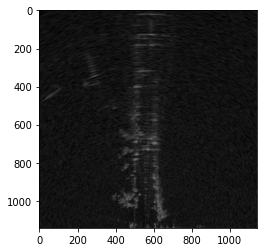

In [29]:
import matplotlib.pyplot as plt
plt.imshow(img)
# img.shape

In [35]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

In [37]:
bbs = BoundingBoxesOnImage([
    BoundingBox(x1=x['bbox'][0], y1=x['bbox'][1],
                x2=x['bbox'][0]+x['bbox'][2], y2=x['bbox'][1]+x['bbox'][3])
    for x in img_anns
], shape=img.shape)


In [38]:
image_before = bbs.draw_on_image(img, size=2)


In [44]:
plt.rcParams['figure.dpi'] = 200
# plt.imshow(image_before)
cv2.imwrite('tmp_anno.png', image_before)

True

### show all annos in train set

In [73]:
from pathlib import Path
from tqdm import tqdm
import cv2

root = '/data2/itri/RAV4/2021-11-24-11-38-59/radar_timelapsed/0_200/no_comp/for_bimo_centernet/radar_cart_train_test_split'
root = Path(root)

train = COCO('/home/ee904/NCTU/research/github/livox_detection/bimo_centernet/train.json')

for ii in tqdm(train.imgs.keys()):
	anns = train.getAnnIds(imgIds=[ii])
	img_anns = train.loadAnns(anns)
	img_path = train.loadImgs(ii)


	img_path = root / img_path[0]['file_name']

	img = cv2.imread(str(img_path))

	bbs = BoundingBoxesOnImage([
			BoundingBox(x1=x['bbox'][0], y1=x['bbox'][1],
									x2=x['bbox'][0]+x['bbox'][2], y2=x['bbox'][1]+x['bbox'][3])
			for x in img_anns
	], shape=img.shape)

	image_before = bbs.draw_on_image(img, size=3)
	cv2.imwrite('tmp_anno/{:06d}.png'.format(int(img_path.stem)), image_before)
	# if '16377251434601' in str(img_path):
	# 	# print('test')
	# 	print(img_anns)
	# 	print(len(img_anns))
	# 	break

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


100%|██████████| 1161/1161 [01:22<00:00, 14.03it/s]
